In [22]:
import sys

import numpy as np
import pandas as pd

# pip install statsmodels
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

import matplotlib.pyplot as plt

sys.path.append("..")
from utils import create_onedrive_directdownload

plt.style.use("ggplot")

In [2]:
onedrive_link = "https://1drv.ms/u/s!AiqdXCxPTydhofYbhA1ASJ6RZ3OjTw?e=Kf4ZBa"
direct_use_link = create_onedrive_directdownload(onedrive_link)
print(direct_use_link)
df = pd.read_csv(direct_use_link, index_col="Month", parse_dates=True)

df.head()

https://api.onedrive.com/v1.0/shares/u!aHR0cHM6Ly8xZHJ2Lm1zL3UvcyFBaXFkWEN4UFR5ZGhvZlliaEExQVNKNlJaM09qVHc_ZT1LZjRaQmE/root/content


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# calculate total NaN values
df.isna().sum()

Passengers    0
dtype: int64

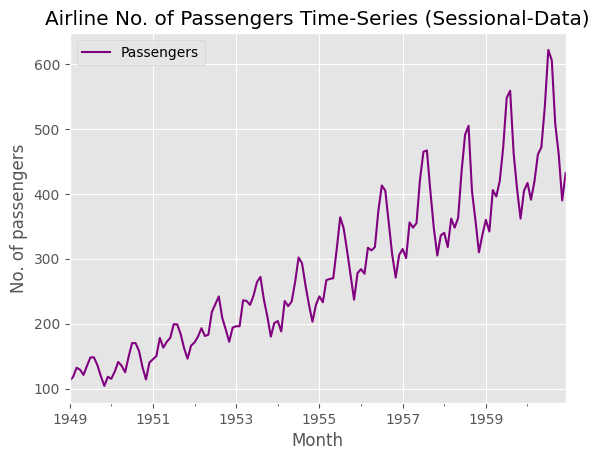

In [11]:
df.plot(color="purple", linestyle="-")
plt.xlabel("Month")
plt.ylabel("No. of passengers")
plt.title("Airline No. of Passengers Time-Series (Sessional-Data)")
plt.show()

In [12]:
# no particular reason to choose 0.2
alpha = 0.2

In [13]:
df["EWMA"] = df["Passengers"].ewm(alpha=alpha, adjust=False).mean()

type(df["Passengers"].ewm(alpha=alpha, adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

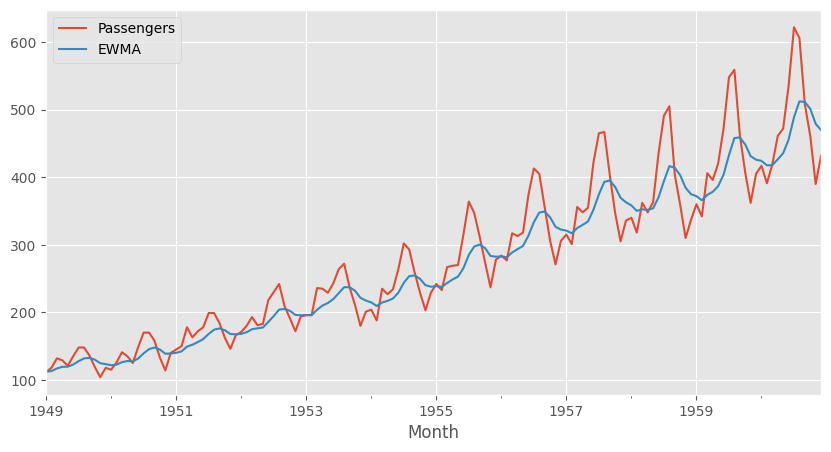

In [15]:
df.plot(figsize=(10,5));

In [18]:
# calculate ewma on your own

manual_ewma = []
for x in df["Passengers"].to_numpy():
    if len(manual_ewma) > 0:
        xhat = alpha * x + (1-alpha) * manual_ewma[-1]
    else:
        xhat = x
    manual_ewma.append(xhat)
    
# now store the result to the dataset
df["Manual"] = manual_ewma

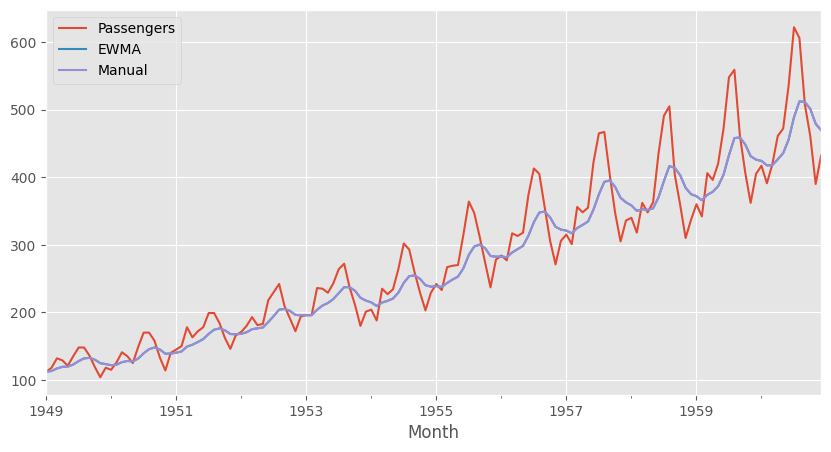

In [19]:
df.plot(figsize=(10,5));

In [20]:
# drop our manual calculation
df.drop("Manual", axis=1, inplace=True)